<IPython.core.display.Javascript object>


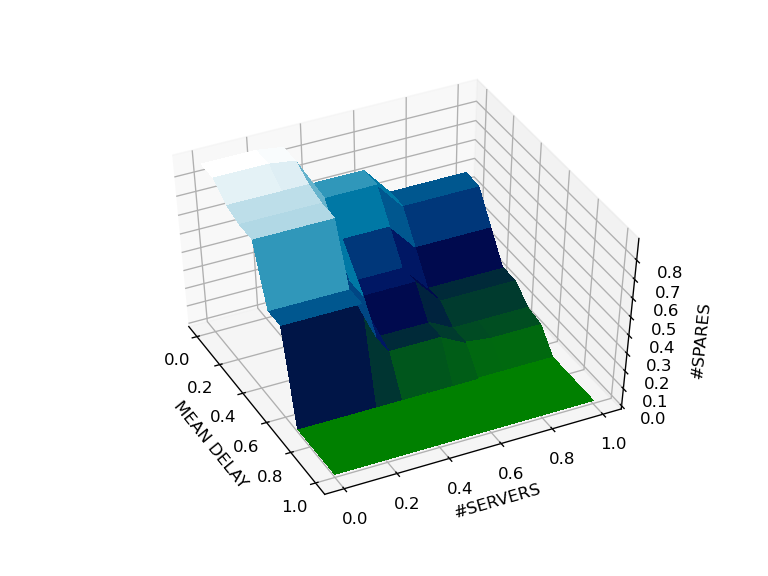

Text(0.5, 0, '#SPARES')

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from matplotlib import *

#step 1. Define the linguistic variables
mean_delay = np.arange(0, 1.1, 0.1)
servers = np.arange(0, 1.1, 0.1)
utilisation_factor = np.arange(0, 1.1, 0.1)
spares = np.arange(0, 1.1, 0.1)

#input
mean_delay_very_short = fuzz.trapmf(mean_delay, [0, 0, 0.1, 0.3])
mean_delay_short = fuzz.trimf(mean_delay, [0.1, 0.3, 0.5])
mean_delay_medium = fuzz.trapmf(mean_delay, [0.4, 0.6, 0.7, 0.7])

servers_small = fuzz.trapmf(servers, [0, 0, 0.2, 0.35])
servers_medium = fuzz.trimf(servers, [0.3, 0.5, 0.7])
servers_large = fuzz.trapmf(servers, [0.6, 0.8, 1, 1])

utilisation_factor_low = fuzz.trapmf(utilisation_factor, [0, 0, 0.4, 0.6])
utilisation_factor_medium = fuzz.trimf(utilisation_factor, [0.4, 0.6, 0.8])
utilisation_factor_high = fuzz.trapmf(utilisation_factor, [0.6, 0.8, 1, 1])

#output
spares_very_small = fuzz.trapmf(spares, [0, 0, 0.1, 0.3])
spares_small = fuzz.trimf(spares, [0, 0.2, 0.4])
spares_rather_small = fuzz.trimf(spares, [0.25, 0.35, 0.45])
spares_medium = fuzz.trimf(spares, [0.3, 0.5, 0.7])
spares_rather_large = fuzz.trimf(spares, [0.55, 0.65, 0.75])
spares_large = fuzz.trimf(spares, [0.6, 0.8, 1])
spares_very_large = fuzz.trapmf(spares, [0.7, 0.9, 1, 1])

X = mean_delay.reshape((len(mean_delay), 1))
Y = servers.reshape((1, len(servers)))
Z = np.zeros((len(mean_delay), len(servers)), dtype = float)

for delay in range(len(mean_delay)):
    for server in range(len(servers)):
        user_delay = mean_delay[delay]
        user_server = servers[server]
            
        mean_delay_very_short_prob = fuzz.interp_membership(mean_delay, mean_delay_very_short, user_delay)
        mean_delay_short_prob = fuzz.interp_membership(mean_delay, mean_delay_short, user_delay)
        mean_delay_medium_prob = fuzz.interp_membership(mean_delay, mean_delay_medium, user_delay)
        servers_small_prob = fuzz.interp_membership(servers, servers_small, user_server)
        servers_medium_prob = fuzz.interp_membership(servers, servers_medium, user_server)
        servers_large_prob = fuzz.interp_membership(servers, servers_large, user_server)
       
               
        #active rule 4
        active_rule4 = min([mean_delay_very_short_prob, servers_small_prob])
        r4 = np.fmin(active_rule4, spares_very_large)
        #active rule 5
        active_rule5 = min([mean_delay_short_prob, servers_small_prob])
        r5 = np.fmin(active_rule5, spares_large)
        #active rule 6
        active_rule6 = min([mean_delay_medium_prob, servers_small_prob])
        r6 = np.fmin(active_rule6, spares_medium)
        #active rule 7
        active_rule7 = min([mean_delay_very_short_prob, servers_medium_prob])
        r7 = np.fmin(active_rule7, spares_rather_large)
        #active rule 8
        active_rule8 = min([mean_delay_short_prob, servers_medium_prob])
        r8 = np.fmin(active_rule8, spares_rather_small)
        #active rule9
        active_rule9 = min([mean_delay_medium_prob, servers_medium_prob])
        r9 = np.fmin(active_rule9, spares_small)
        #active rule10
        active_rule10 = min([mean_delay_very_short_prob, servers_large_prob])
        r10 = np.fmin(active_rule10, spares_medium)
        #active rule11
        active_rule11 = min([mean_delay_short_prob, servers_large_prob])
        r11 = np.fmin(active_rule11, spares_small)
        #active rule12
        active_rule12 = min([mean_delay_medium_prob, servers_large_prob])
        r12 = np.fmin(active_rule12, spares_very_small)
            
        #Step 3.Aggregation of outputs
        aggregation = np.fmax(r4, np.fmax(r5, np.fmax(r6, np.fmax(r7, np.fmax(r8, np.fmax(r9, np.fmax(r10, np.fmax(r11, r12))))))))
            
        #Step 4.Defuzzification
        Z[delay, server] = fuzz.defuzzify.centroid(spares, aggregation)

%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.ocean, linewidth=1, antialiased=False)
#ax1.plot_wireframe(X,Y,Z, cmap=cm.jet)
ax1.set_xlabel('MEAN DELAY')
ax1.set_ylabel('#SERVERS')
ax1.set_zlabel('#SPARES')